In [1]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 34.6 MB/s eta 0:00:00


In [8]:
import rasterio as rio
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import geopandas as gpd

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the CSV file containing class labels
class_labels_df = pd.read_csv('/content/drive/MyDrive/Project_2/Insect Pest/tif files/Agriculture_crop_Tiff_files/AgricultureCrop_Florida.csv')
class_labels_df.head()

,OID_,Value,Count,Class_Name
0,NaN,1,421511.0,Corn
1,NaN,2,680264.0,Cotton
2,NaN,4,8097.0,Sorghum
3,NaN,5,106300.0,Soybeans
4,NaN,6,82.0,Sunflower


In [5]:
# Create a dictionary to map pixel values to class labels
value_to_class = dict(zip(class_labels_df['Value'], class_labels_df['Class_Name']))
value_to_class

{1: 'Corn',
 2: 'Cotton',
 4: 'Sorghum',
 5: 'Soybeans',
 6: 'Sunflower',
 10: 'Peanuts',
 11: 'Tobacco',
 12: 'Sweet Corn',
 21: 'Barley',
 24: 'Winter Wheat',
 26: 'Dbl Crop WinWht/Soybeans',
 27: 'Rye',
 28: 'Oats',
 29: 'Millet',
 37: 'Other Hay/Non Alfalfa',
 42: 'Dry Beans',
 43: 'Potatoes',
 44: 'Other Crops',
 45: 'Sugarcane',
 46: 'Sweet Potatoes',
 47: 'Misc Vegs & Fruits',
 48: 'Watermelons',
 50: 'Cucumbers',
 53: 'Peas',
 54: 'Tomatoes',
 58: 'Clover/Wildflowers',
 59: 'Sod/Grass Seed',
 61: 'Fallow/Idle Cropland',
 67: 'Peaches',
 69: 'Grapes',
 71: 'Other Tree Crops',
 72: 'Citrus',
 74: 'Pecans',
 92: 'Aquaculture',
 111: 'Open Water',
 121: 'Developed/Open Space',
 122: 'Developed/Low Intensity',
 123: 'Developed/Med Intensity',
 124: 'Developed/High Intensity',
 131: 'Barren',
 141: 'Deciduous Forest',
 142: 'Evergreen Forest',
 143: 'Mixed Forest',
 152: 'Shrubland',
 176: 'Grassland/Pasture',
 190: 'Woody Wetlands',
 195: 'Herbaceous Wetlands',
 205: 'Triticale',
 2

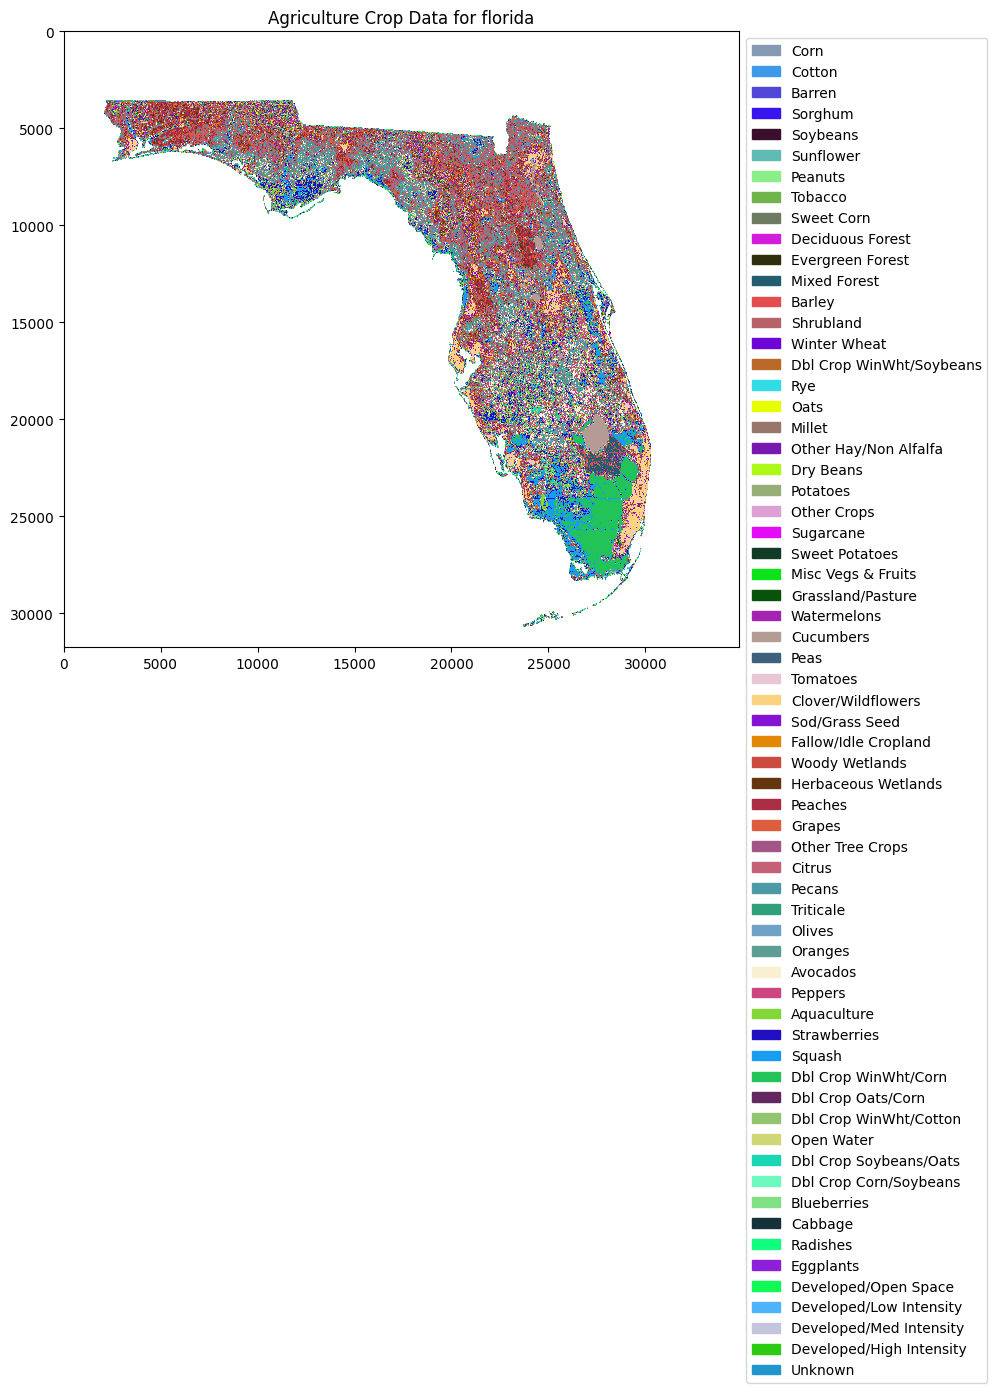

In [6]:
# Open the TIFF file
with rio.open('/content/drive/MyDrive/Project_2/Insect Pest/tif files/Agriculture_crop_Tiff_files/Florida/clipped.TIF') as src:
    # Read the TIFF file as a numpy array
    tiff_array = src.read(1)  # Assuming it's a single band TIFF, change the index if it's a multiband TIFF

    # Get unique pixel values from the TIFF array
    unique_values = list(set(tiff_array.flatten()))

    # Generate random colors for each unique class label
    class_colors = [f'#{random.randint(0x000000, 0xFFFFFF):06x}' for _ in range(len(unique_values))]

    # Add a white color for regions outside the map (where class labels are not present)
    class_colors.append('#FFFFFF')

    # Create a custom colormap based on the generated class colors
    colormap = ListedColormap(class_colors, len(unique_values) + 1)  # Add 1 for the white background

    plt.figure(figsize=(15, 8))
    # Plot the TIFF array with the colormap
    plt.imshow(tiff_array, cmap=colormap, vmin=unique_values[0], vmax=unique_values[-1])

    # Set the title of the plot
    plt.title('Agriculture Crop Data for florida')

    # Create a custom legend with class labels and colors
    legend_elements = [plt.Rectangle((0, 0), 1, 1, color=class_colors[i]) for i in range(len(unique_values))]
    class_labels_legend = [value_to_class.get(val, "Unknown") for val in unique_values]

    # Plot the legend outside of the map using bbox_to_anchor
    plt.legend(legend_elements, class_labels_legend, loc='upper left', bbox_to_anchor=(1, 1))

    # Save the plot as a TIFF file
   # plt.savefig('/content/drive/MyDrive/Project_2/Insect Pest/tif files/Agriculture_crop_Tiff_files/Agriculture_crop_Florida.tif', dpi=300, bbox_inches='tight', format='tiff')

    # Display the plot
    plt.show()

In [ ]:
# Open the TIFF file
with rio.open('/content/drive/MyDrive/Project_2/Insect Pest/tif files/Agriculture_crop_Tiff_files/Florida/clipped.TIF') as src:
    # Read the TIFF file as a numpy array
    tiff_array = src.read(1)  # Assuming it's a single band TIFF, change the index if it's a multiband TIFF

    # Get unique pixel values from the TIFF array
    unique_values = list(set(tiff_array.flatten()))

    # Generate random colors for each unique class label
    class_colors = [f'#{random.randint(0x000000, 0xFFFFFF):06x}' for _ in range(len(unique_values))]

    # Add a white color for regions outside the map (where class labels are not present)
    class_colors.append('#FFFFFF')

    # Create a custom colormap based on the generated class colors
    colormap = ListedColormap(class_colors, len(unique_values) + 1)  # Add 1 for the white background

    # Load the species data points
    species_data = gpd.read_file('/content/drive/MyDrive/Project_2/Insect Pest/Species Data/GBIF Site/Diaprepes_abbreviatus(2012-2023).gpkg')

    # Transform the CRS of the species data to match the CRS of the TIFF file
    species_data = species_data.to_crs("EPSG:3857")
    # Filter the species data to include only points within the extent of the TIFF background
    species_data = species_data.cx[src.bounds[0]:src.bounds[2], src.bounds[1]:src.bounds[3]]

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot the TIFF array with the colormap
    img = ax.imshow(tiff_array, cmap=colormap, vmin=unique_values[0], vmax=unique_values[-1], extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])

    # Plot species data on top of the TIFF plot
    species_data.plot(ax=ax, markersize=30, color='Black', label='Species Data')

    # Set the title of the plot
    ax.set_title('Agriculture Crop for Florida (2022)')

    # Create a custom legend with class labels and colors
    legend_elements = [plt.Rectangle((0, 0), 1, 1, color=class_colors[i]) for i in range(len(unique_values))]
    class_labels_legend = [value_to_class.get(val, "Unknown") for val in unique_values]

    # Plot the legend outside of the map using bbox_to_anchor
    plt.legend(legend_elements, class_labels_legend, loc='upper left', bbox_to_anchor=(1, 1))


    # Plot the legend
    #ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()
